In [1]:
from gurobipy import Model, GRB
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

stocks = pd.read_csv("stocks.csv")

# Get all the stock names to iterate over
stock_names = stocks.columns[1:]

for s in stock_names:
    stocks[s] = stocks[s].pct_change() * 100.0

stocks = stocks.dropna().drop("Date", axis=1)
stocks

,AAPL,GOOG,IBM,MARA,NVDA
1,5.257744,1.440370,-4.822947,-0.619579,14.159983
2,5.872672,4.478207,1.897465,-11.845387,3.609136
3,-2.258887,-9.846037,-0.978528,-16.265912,0.781988
4,1.174039,-0.284635,-0.427730,30.067568,0.578420
5,-3.828253,-5.539696,-3.295806,-13.376623,8.874133
6,2.944577,5.226636,-0.712268,-4.347826,2.593830
7,-1.675162,-3.201441,-3.232029,-16.457680,-3.871913
8,4.377104,12.581031,-1.402945,53.283302,12.018292
9,3.387098,3.513565,1.293556,-4.406365,4.097185
10,2.901723,-1.942295,4.629256,11.651729,3.726793


In [2]:
stock_return = stocks.mean()
cov_mat = stocks.cov()

# Optimization Model

In [3]:
m = Model("Portfolio")

vars = pd.Series(m.addVars(stock_names), index=stock_names)

portfolio_risk = cov_mat.dot(vars).dot(vars)

m.setObjective(portfolio_risk, GRB.MINIMIZE)

m.addConstr(vars.sum() == 1, "budget")
m.addConstr(stock_return.dot(vars) >= 0.009, "return")

m.optimize()

for v in vars:
    print(f"{v.varName}: {v.x}")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-25
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.3.0 23D56)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 5 columns and 10 nonzeros
Model fingerprint: 0x95179706
Model has 15 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 3e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [4e+00, 6e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e-03, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 5 columns, 10 nonzeros
Presolved model has 15 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 4
 AA' NZ     : 1.500e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual 

# Efficient Frontier

In [4]:
stock_volatility = stocks.std()
stock_return = stocks.mean()
cov_mat = stocks.cov()

print(stock_return.min(), stock_return.max())
returns = np.linspace(stock_return.min(), stock_return.max(), 100)

0.42435027560400257 2.622471777625807


In [5]:
ret_list = []
risks = []
props = []

for ret in returns:
    m.reset()
    m = Model("Portfolio Optimization")
    m.setParam("OutputFlag", 0)
    vars = pd.Series(m.addVars(stock_names, lb=0), index=stock_names)
    portfolio_risk = cov_mat.dot(vars).dot(vars)
    m.setObjective(portfolio_risk, GRB.MINIMIZE)
    m.addConstr(vars.sum() == 1, "budget")
    m.addConstr(stock_return.dot(vars) >= ret, name="return_sim")
    m.update()
    m.optimize()
    risks.append(np.sqrt(m.ObjVal))
    ret_list.append(stock_return.dot(m.x))
    props.append(m.x)

Discarded solution information


In [6]:
props_pd = pd.DataFrame(props, columns=stock_names)
props_pd["return"] = ret_list
props_pd["risk"] = risks

# Find the portfolio with the maximum return at a risk of approx 1.5
low_portfolio = props_pd.loc[props_pd["return"] <= 1.5, "return"].idxmax()

# Find the portfolio with the maximum return at a risk of approx 2.5
high_portfolio = props_pd.loc[props_pd["return"] <= 2.5, "return"].idxmax()

props_pd.iloc[[low_portfolio, high_portfolio]].round(3)

,AAPL,GOOG,IBM,MARA,NVDA,return,risk
48,0.0,0.031,0.460,0.062,0.446,1.490,3.324
93,0.0,0.000,0.002,0.116,0.883,2.489,5.742


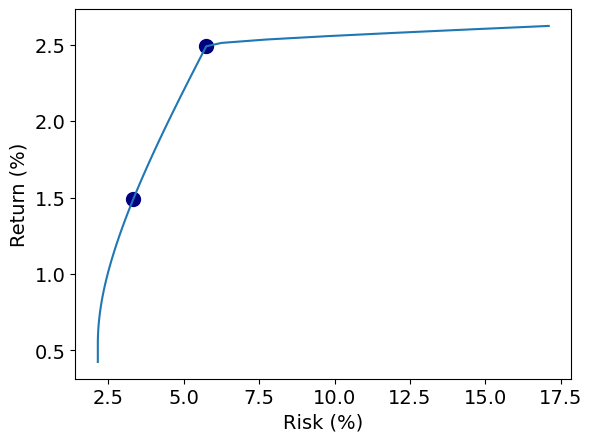

In [7]:
plt.rcParams.update({"font.size": 14})
plt.xlabel("Risk (%)")
plt.plot(risks, returns)
plt.scatter([5.742, 3.324], [2.489, 1.490], color='navy', marker='o', s=100)
plt.ylabel("Return (%)")
plt.show()